# The Laplacian of Gaussian kernel
As noted by [1], when when one wishes to apply a sharpening filter (i.e., laplacian) over an image to increase edge intensity, one would typically apply a gaussian smoothing convolution filter before sharpening. The main purpose for smoothing prior to sharpening, is that the laplacian is sensitive to noise, and as such high-frequency noise components are reduced and hence not enhanced by the effects of sharpening. The author notes that one might first perform convolution of a gaussian filter, followed by convolution of a sharpening filter onto the desired image to be sharpened. The author suggests that one might instead save on overall computional effort by first convolving the gaussian filter with the sharpening filter, and then use the merged filter as a combination smoothing-sharpening filter - the Laplacian of Gaussian (LoG) filter:

$\Large LoG(x, y) = -\frac{1}{\pi \sigma^4} \begin{bmatrix} 1 - \frac{x^2 + y^2}{2\sigma^2}\end{bmatrix} e^{- \frac{x^2+y^2}{2\sigma^2}} $

The author notes that they define the Laplacian using a negative peak, but use of the opposite sign is also valid.

[1] https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def laplacian_of_gaussian(x, y, sigma):
    p = (x**2.0 + y**2.0) / 2.0 * sigma**2.0
    return -(1.0 / (np.pi * sigma**4.0)) * (1.0 - p) * np.exp(-p)

In [100]:
# Notes on inflection points: 
# https://magoosh.com/hs/ap/ap-calculus-review-inflection-points/
# https://www.geeksforgeeks.org/inflection-points/

sigma = 0.024247946 * 2 # std dev of full PSF * 2 (as std dev goes outwards from center, pos and neg)?
samples = 99 # valid number of samples in PSF (excludes first full row and col, to enforce symmetry around center)
steps = np.linspace(-100.0, 100.0, num=samples)
log = np.zeros((samples, samples))

for x in np.arange(steps.shape[0]):
    for y in np.arange(steps.shape[0]):
        log[x][y] = laplacian_of_gaussian(steps[x], steps[y], sigma)

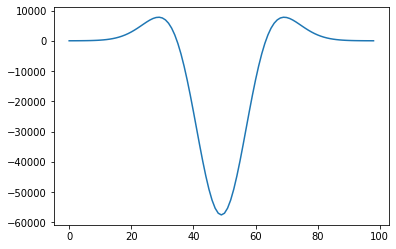

99


In [102]:
plt.plot(log[log.shape[0]//2])
# plt.imshow(log)
plt.show()